In [ ]:
from raw2Dataframe import ThermoRawfile2DataFrames
import numpy as np


In [ ]:
filename = r'd:\ownCloud\LX2_Dev\Data_Jacobo\tSIM RAW\Ult_1NIST_2.raw'
# filename = r'd:\ownCloud\LX2_Dev\Data_Jacobo\Negative_tSIM_Stitched_mzXML\Ult_1NIST_2-s.mzXML'

In [ ]:
MSrawscansDF, MSPeakDatasDF = ThermoRawfile2DataFrames(filename)

In [1908]:
MSrawscansDF.filterLine.value_counts()

FTMS + p NSI Full ms [400.0000-1000.0000]                      23
FTMS - p NSI Full ms [400.0000-1000.0000]                      18
FTMS + p NSI SIM ms [460.0000-500.0000]                         8
FTMS + p NSI SIM ms [800.0000-840.0000]                         8
FTMS + p NSI SIM ms [760.0000-800.0000]                         8
                                                               ..
FTMS + p NSI Full ms2 895.8328@hcd15.00 [180.0000-930.0000]     1
FTMS + p NSI Full ms2 947.8798@hcd15.00 [180.0000-985.0000]     1
FTMS - p NSI Full ms2 796.5917@hcd22.00 [180.0000-830.0000]     1
FTMS - p NSI Full ms2 868.7318@hcd22.00 [180.0000-905.0000]     1
FTMS - p NSI Full ms2 874.6387@hcd22.00 [180.0000-910.0000]     1
Name: filterLine, Length: 396, dtype: int64

In [1909]:
ms1_scans = MSrawscansDF[MSrawscansDF.filterLine.str.contains(' ms ') & MSrawscansDF.filterLine.str.contains(' \+ ') & ~MSrawscansDF.filterLine.str.contains(' SIM ')]
ms1_scan_count = ms1_scans.shape[0]
ms1_scan_count

23

In [1993]:
ms1_data = ms1_scans.merge(MSPeakDatasDF, on='scanNum')
ms1_data

,scanNum,filterLine,retTime,chargeState,isolationMass,mass,intensity,resolution,baseline,noise,charge
0,1,FTMS + p NSI Full ms [400.0000-1000.0000],0.202289,0,700,400.146271,3918.282959,97600.0,-4.913478,510.659668,0.0
1,1,FTMS + p NSI Full ms [400.0000-1000.0000],0.202289,0,700,400.153015,922.643066,67100.0,-4.910918,510.672760,0.0
2,1,FTMS + p NSI Full ms [400.0000-1000.0000],0.202289,0,700,400.212891,3830.187988,100100.0,-4.888188,510.789062,0.0
3,1,FTMS + p NSI Full ms [400.0000-1000.0000],0.202289,0,700,400.255035,1163.124146,75700.0,-4.872190,510.870911,0.0
4,1,FTMS + p NSI Full ms [400.0000-1000.0000],0.202289,0,700,400.264954,2205.365234,84600.0,-4.868424,510.890167,0.0
...,...,...,...,...,...,...,...,...,...,...,...
35925,23,FTMS + p NSI Full ms [400.0000-1000.0000],12.9645,0,700,982.278381,13660.205078,59203.0,99.223663,2369.378418,1.0
35926,23,FTMS + p NSI Full ms [400.0000-1000.0000],12.9645,0,700,983.278748,10721.702148,55000.0,99.106598,2369.673096,1.0
35927,23,FTMS + p NSI Full ms [400.0000-1000.0000],12.9645,0,700,984.274780,6232.477051,46700.0,98.990044,2369.966309,1.0
35928,23,FTMS + p NSI Full ms [400.0000-1000.0000],12.9645,0,700,984.586060,5722.229004,47300.0,98.953613,2370.058105,0.0


In [1911]:
# df = ms1_data[ms1_data.intensity.between(*ms1_data.intensity.quantile([.1,.9]))].mass.to_frame()
# df['mz'] = df.mass
# df.sort_values("mz", ascending=False, inplace=True)
# df["mz_diff"] = df.mass.diff(-1).shift()

# this is for peak presicion, not dpm

In [1912]:
# df["mz_diff"] =  df["mz_diff"].where(df["mz_diff"] > 0.0001, np.nan)

In [1913]:
# df["mz_diff"] = df['mz'] / df["mz_diff_abs"].where(df["mz_diff_abs"] > 0.0001, np.nan)

In [1994]:
df = ms1_data.mass.to_frame()
df['mz'] = df.mass
df["mz_diff"] = df.mass.diff() # because its between two peaks
df.sort_values("mz", ascending=False, inplace=True)
df['mz_diff_scans'] = df.mass.diff(-1)

In [1955]:
import math
dpm_count = 10#math.ceil(math.sqrt(ms1_scan_count) / 0.7)

In [2008]:
df = df.assign(rmass = lambda x: x.mz.round()).sort_values(["rmass","mz_diff"], ascending=False)

In [2022]:
df.head(30)

,mass,mz,mz_diff,mz_diff_scans,rmass,mz_diff_long,mz_diff_scans_long,dpm,mass_pres
3577,999.641602,999.641602,1.003174,1.003174,1000.0,NaN,NaN,NaN,NaN
15051,998.637695,998.637695,4.306763,0.000061,999.0,NaN,NaN,NaN,NaN
13705,998.637634,998.637634,4.304810,0.000122,999.0,NaN,NaN,NaN,NaN
6823,998.635742,998.635742,2.307129,0.036133,999.0,NaN,NaN,NaN,NaN
12207,998.637512,998.637512,2.305908,0.000305,999.0,NaN,NaN,NaN,NaN
25576,998.635864,998.635864,2.304688,0.000122,999.0,NaN,NaN,NaN,NaN
19708,998.637878,998.637878,1.309387,0.000183,999.0,NaN,NaN,NaN,NaN
5166,998.637207,998.637207,1.307800,0.001343,999.0,NaN,NaN,NaN,NaN
3575,998.599609,998.599609,0.266418,0.266418,999.0,NaN,NaN,NaN,NaN
3576,998.638428,998.638428,0.038818,0.000549,999.0,NaN,NaN,NaN,NaN


In [2009]:
df["mz_diff_long"] = (
        df["mz_diff"]
        .where(df["mz_diff"] >= 0.000, np.nan)
        # .rolling(dpm_count, min_periods=dpm_count)
        .rolling(ms1_scan_count, min_periods=int(ms1_scan_count*.7))
        .mean()
    )

In [2010]:
df["mz_diff_scans_long"] = (
        df["mz_diff_scans"]
        .where(df["mz_diff_scans"] > 0.0001, np.nan)
        .rolling(ms1_scan_count, min_periods=int(ms1_scan_count*.7))
        .mean()
    )


In [1959]:
# df["mz_diff_long"] = df["mz_diff_long"].fillna(method = 'bfill').fillna(method = 'ffill')

In [2011]:
df['dpm'] = df.mz_diff_long.cummin()
df['mass_pres'] = df["mz_diff_scans_long"].cummin()

In [2012]:
df.assign(interesting = lambda x: (x.mz_diff_long == x.dpm) |(x.mz_diff_scans_long == x.mass_pres)).to_clipboard()


In [1962]:
# df['dpm_ra'] = df['mz']/df['dpm']
# df['dpm_r'] = df['dpm_ra'].cummax()

In [2013]:
res_df = df[(df.mz_diff_long == df.dpm) | (df.mz_diff_scans_long == df.mass_pres)]


In [2014]:
res_df.sort_values('mass', inplace=True)


c:\Users\mirandaa\Anaconda3\envs\lx128_p3_Dev\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [2015]:
res_df['dpm_r'] = res_df['mass'] / res_df['dpm']

c:\Users\mirandaa\Anaconda3\envs\lx128_p3_Dev\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [2023]:
res_df.head(30)

,mass,mz,mz_diff,mz_diff_scans,rmass,mz_diff_long,mz_diff_scans_long,dpm,mass_pres,dpm_r
6958,428.205231,428.205231,0.006317,0.000214,428.0,0.006813,NaN,0.006813,NaN,62847.685881
34698,428.205261,428.205261,0.006226,0.000031,428.0,0.006740,NaN,0.006740,NaN,63528.127953
32157,428.205383,428.205383,0.006348,0.000000,428.0,0.007016,NaN,0.007016,NaN,61029.308245
29545,428.205383,428.205383,0.006439,0.000061,428.0,0.007485,NaN,0.007485,NaN,57210.243219
19789,428.205536,428.205536,0.006195,0.000031,428.0,0.006673,NaN,0.006673,NaN,64172.419368
5287,428.205627,428.205627,0.006378,0.000092,428.0,0.007247,NaN,0.007247,NaN,59085.164042
22554,428.205750,428.205750,0.006317,0.000092,428.0,0.006886,NaN,0.006886,NaN,62181.745279
33682,486.350342,486.350342,0.007233,0.000183,486.0,0.007724,NaN,0.007724,NaN,62969.377083
28576,486.350494,486.350494,0.006927,0.000061,486.0,0.007586,NaN,0.007586,NaN,64114.895750
8964,486.350616,486.350616,0.007355,0.000061,486.0,0.007919,NaN,0.007919,NaN,61418.389913


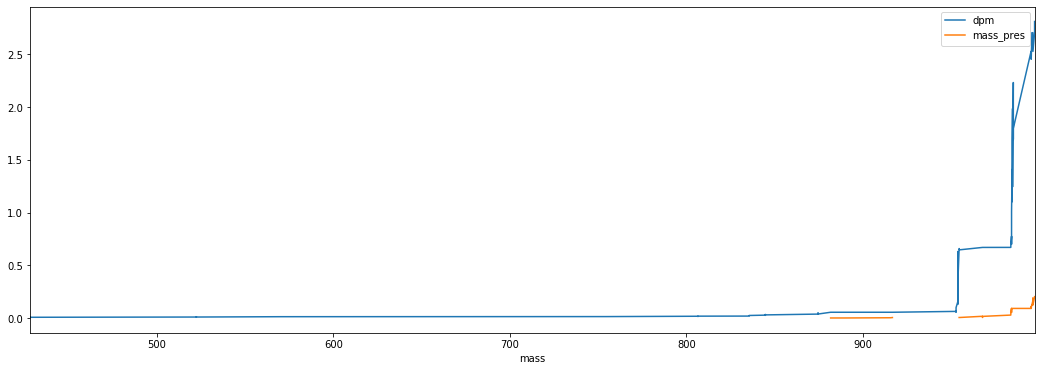

In [2017]:
import matplotlib.pyplot as plt
fig1, ax = plt.subplots(figsize=(18,6))
res_df.plot(x='mass',y='dpm', ax = ax)
# res_df.plot(x ='mass', y = 'dpm_r', ax = ax, secondary_y=True)
res_df.plot(x ='mass', y = 'mass_pres', ax = ax)


In [2005]:
res_df.sort_values('mass', inplace=True)


c:\Users\mirandaa\Anaconda3\envs\lx128_p3_Dev\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [2019]:
ms1_data['dpm'] = np.interp(ms1_data.mass, res_df.mass, res_df.dpm)
ms1_data['dpm_r'] = ms1_data['mass'] / ms1_data['dpm']

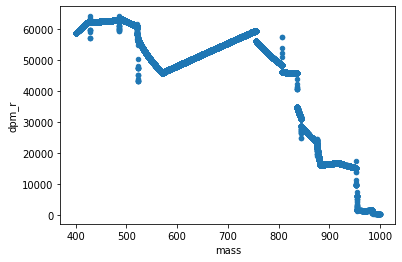

In [2020]:
ms1_data.plot.scatter(x='mass',y='dpm_r')

In [1971]:
quant = .10
lx1_res_mass = ms1_data.mass.quantile(quant)
lx1_res = ms1_data[ms1_data.mass <lx1_res_mass].resolution.mean()
lx1_res_delta = (ms1_data[ms1_data.mass > ms1_data.mass.quantile(1-quant)].resolution.mean() -  ms1_data[ms1_data.mass < ms1_data.mass.quantile(quant)].resolution.mean()) / (ms1_data.mass.quantile(1-quant) - ms1_data.mass.quantile(quant) )
lx1_res_mass, lx1_res, lx1_res_delta

(439.1797576904297, 83234.65404954077, -51.05381113818325)

In [1972]:
ms1_data['lx1_res'] = lx1_res
ms1_data['lx1_res_d'] = ((ms1_data.mass - lx1_res_mass) * lx1_res_delta) + lx1_res
ms1_data['lx1_res_d'] = np.maximum(ms1_data['lx1_res_d'], lx1_res/10)


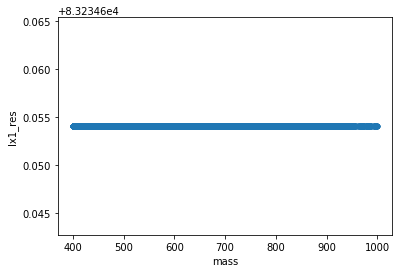

In [1973]:
ms1_data.plot.scatter(x='mass',y='lx1_res')

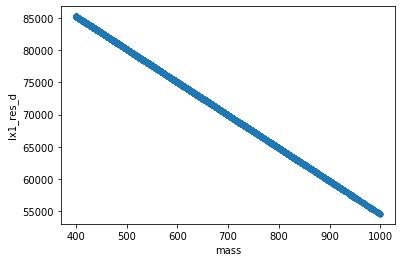

In [1974]:
ms1_data.plot.scatter(x='mass',y='lx1_res_d')

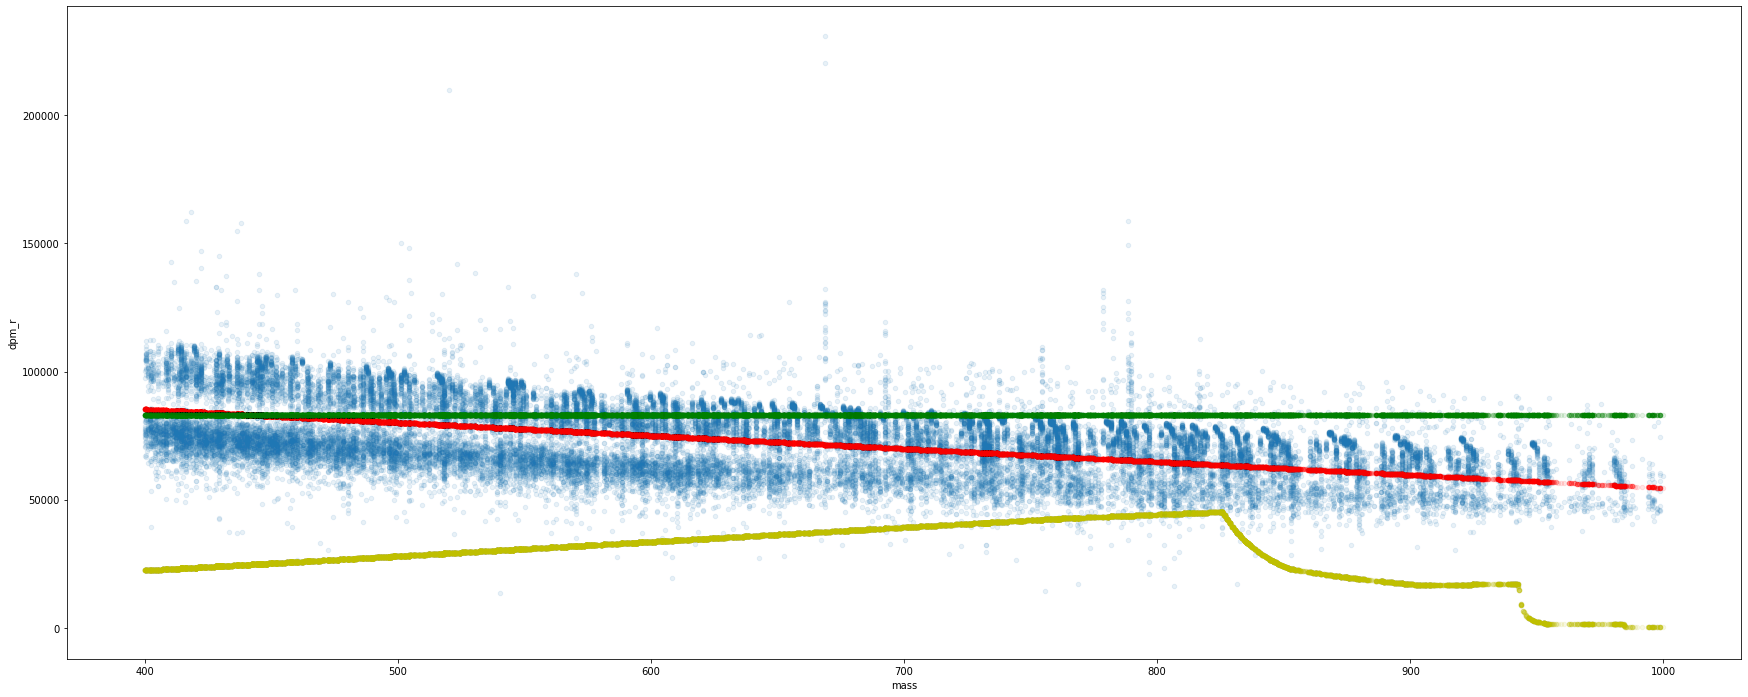

In [1975]:
fig1, ax1 = plt.subplots(figsize=(30,12))
ms1_data.plot.scatter(x='mass',y='resolution', alpha=0.1, ax = ax1)
ms1_data.plot.scatter(x='mass',y='lx1_res_d', color = 'r', alpha=0.1,ax = ax1)
ms1_data.plot.scatter(x='mass',y='lx1_res', color = 'g', alpha=0.1,ax = ax1)
ms1_data.plot.scatter(x='mass',y='dpm_r',  color = 'y', alpha=0.1,ax = ax1)


In [1976]:
ms1_data['dpm_1'] = 1 / ms1_data['dpm']
ms1_data['lx1_res_1'] = ms1_data['lx1_res'] / ms1_data['mass']
ms1_data['lx1_res_d_1'] =  ms1_data['lx1_res_d'] / ms1_data['mass']
ms1_data['resolution_1'] = ms1_data['resolution'] / ms1_data['mass']

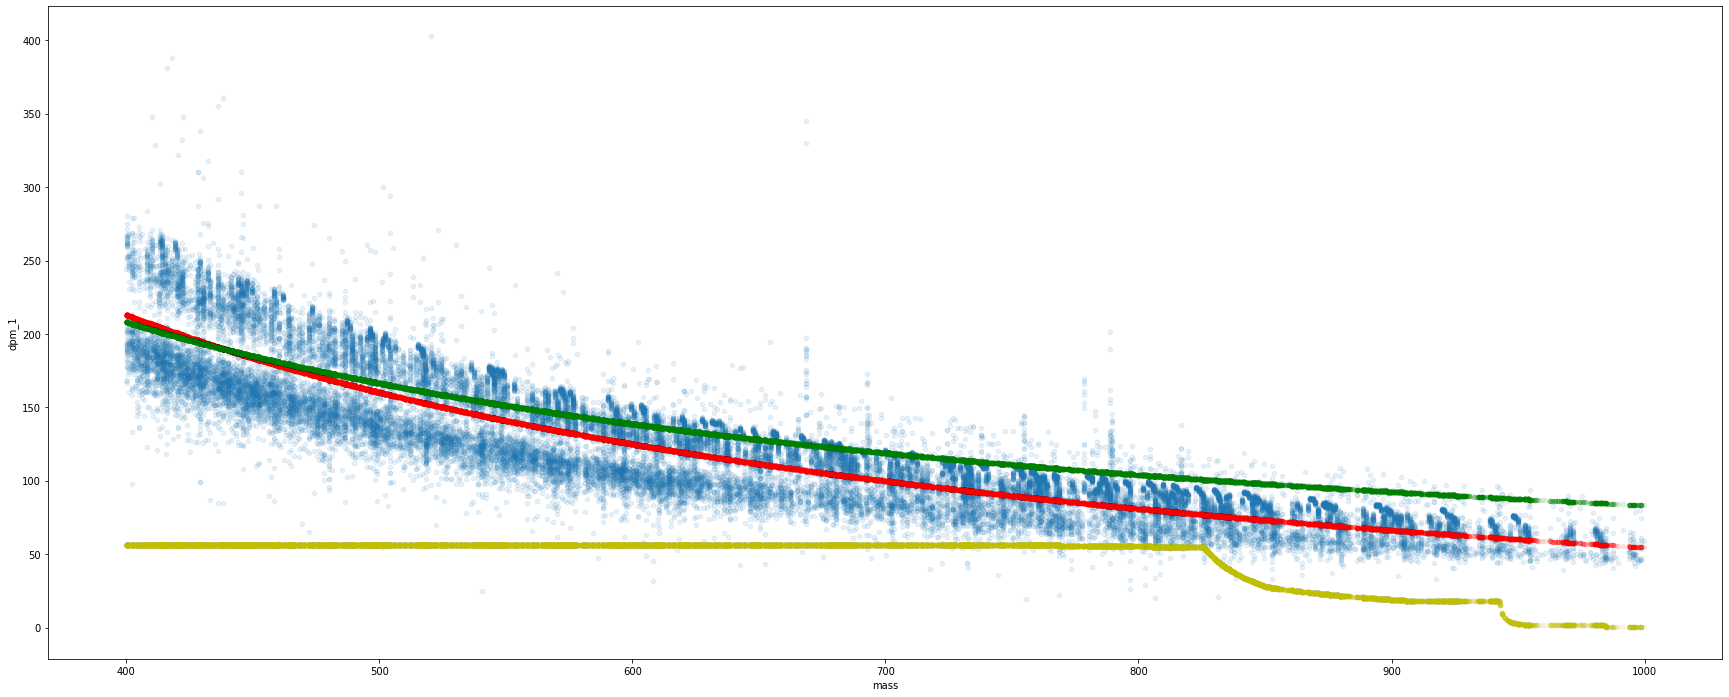

In [1977]:
fig1, ax1 = plt.subplots(figsize=(30,12))
ms1_data.plot.scatter(x='mass',y='resolution_1', alpha=0.1, ax = ax1)
ms1_data.plot.scatter(x='mass',y='lx1_res_d_1', color = 'r', alpha=0.1,ax = ax1)
ms1_data.plot.scatter(x='mass',y='lx1_res_1', color = 'g', alpha=0.1,ax = ax1)
ms1_data.plot.scatter(x='mass',y='dpm_1',  color = 'y', alpha=0.1,ax = ax1)

# ms2 dpm

In [1978]:
ms2_scans = MSrawscansDF[MSrawscansDF.filterLine.str.contains(' ms2 ')]
ms2_scan_count = ms2_scans['filterLine'].value_counts().max()

In [1979]:
ms2_data = ms2_scans.merge(MSPeakDatasDF, on='scanNum')

In [1980]:
df = ms2_data.mass.to_frame()
df['mz_diff'] = df['mass'].diff()
df.loc[df.mz_diff < 0.0001,'mz_diff'] =np.NaN 
df.loc[df.mz_diff > 0.1,'mz_diff'] = np.NaN 

In [1981]:
df.describe()

,mass,mz_diff
count,42984.000000,4262.000000
mean,392.412211,0.037056
std,174.358522,0.026298
min,180.004959,0.000519
25%,244.214294,0.015015
50%,343.019623,0.034058
75%,515.296005,0.053783
max,964.116211,0.099976


In [1982]:
df.sort_values("mass", ascending=False, inplace=True)
df["mz_diff_long"] = (
        df["mz_diff"]
        .where(df["mz_diff"] > 0.0001, np.nan)
        .rolling(ms2_scan_count, min_periods=int(ms2_scan_count*.7))
        .mean()
    )

In [1983]:
df["mz_diff_long"] = df["mz_diff_long"].fillna(method = 'bfill').fillna(method = 'ffill')
df['dpm'] = df.mz_diff_long.cummin()

In [1984]:
res_df = df[df.dpm != df.dpm.shift()].dropna()
res_df.sort_values('mass', inplace=True)
res_df['dpm_r'] = res_df['mass'] / res_df['dpm'] # this is not monotinic
res_df['dpm_1'] = 1 / res_df['dpm']

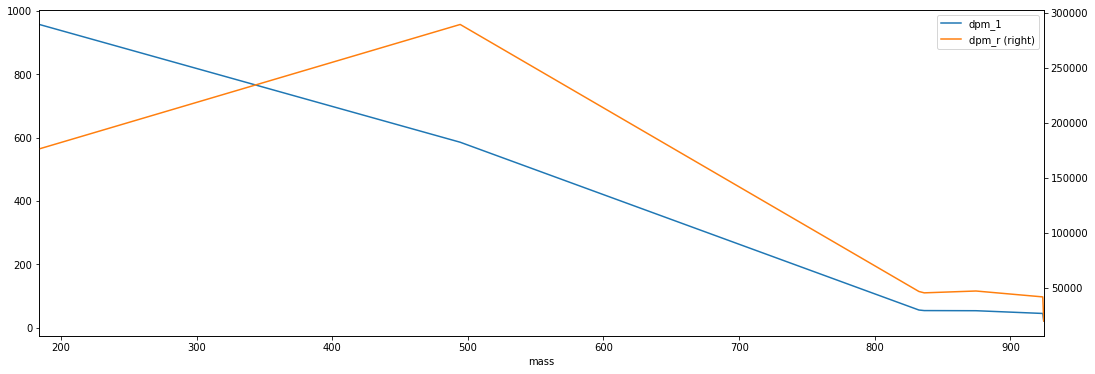

In [1985]:
import matplotlib.pyplot as plt
fig1, ax = plt.subplots(figsize=(18,6))
res_df.plot(x='mass',y='dpm_1', ax = ax)
res_df.plot(x ='mass', y = 'dpm_r', ax = ax, secondary_y=True)

In [1986]:
res_df.sort_values('mass', inplace=True)

In [1987]:
ms2_data['dpm'] = np.interp(ms2_data.mass, res_df.mass, res_df.dpm)
ms2_data['dpm_1'] = 1/ms2_data['dpm']

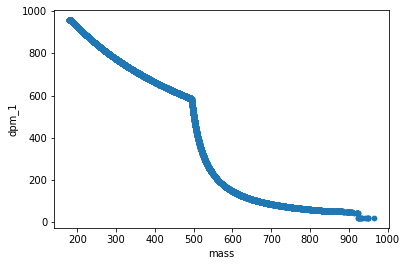

In [1988]:
ms2_data.plot.scatter(x='mass', y='dpm_1')

In [1989]:
ms2_data['resolution_1'] = ms2_data['resolution'] / ms2_data['mass']

In [1990]:
quant = .10
lx1_res_mass = ms2_data.mass.quantile(quant)
lx1_res = ms2_data[ms2_data.mass < lx1_res_mass].resolution.mean()
lx1_res_delta = (ms2_data[ms2_data.mass > ms2_data.mass.quantile(1-quant)].resolution.mean() -  ms2_data[ms2_data.mass < ms2_data.mass.quantile(quant)].resolution.mean()) / (ms2_data.mass.quantile(1-quant) - ms2_data.mass.quantile(quant) )
lx1_res_mass, lx1_res, lx1_res_delta

(202.2168426513672, 114004.87709497206, -115.56210288197168)

In [1991]:
ms2_data['lx1_res_d'] = ((ms2_data.mass - lx1_res_mass) * lx1_res_delta) + lx1_res
ms2_data['lx1_res_d_1'] = ms2_data['lx1_res_d'] / ms2_data['mass']

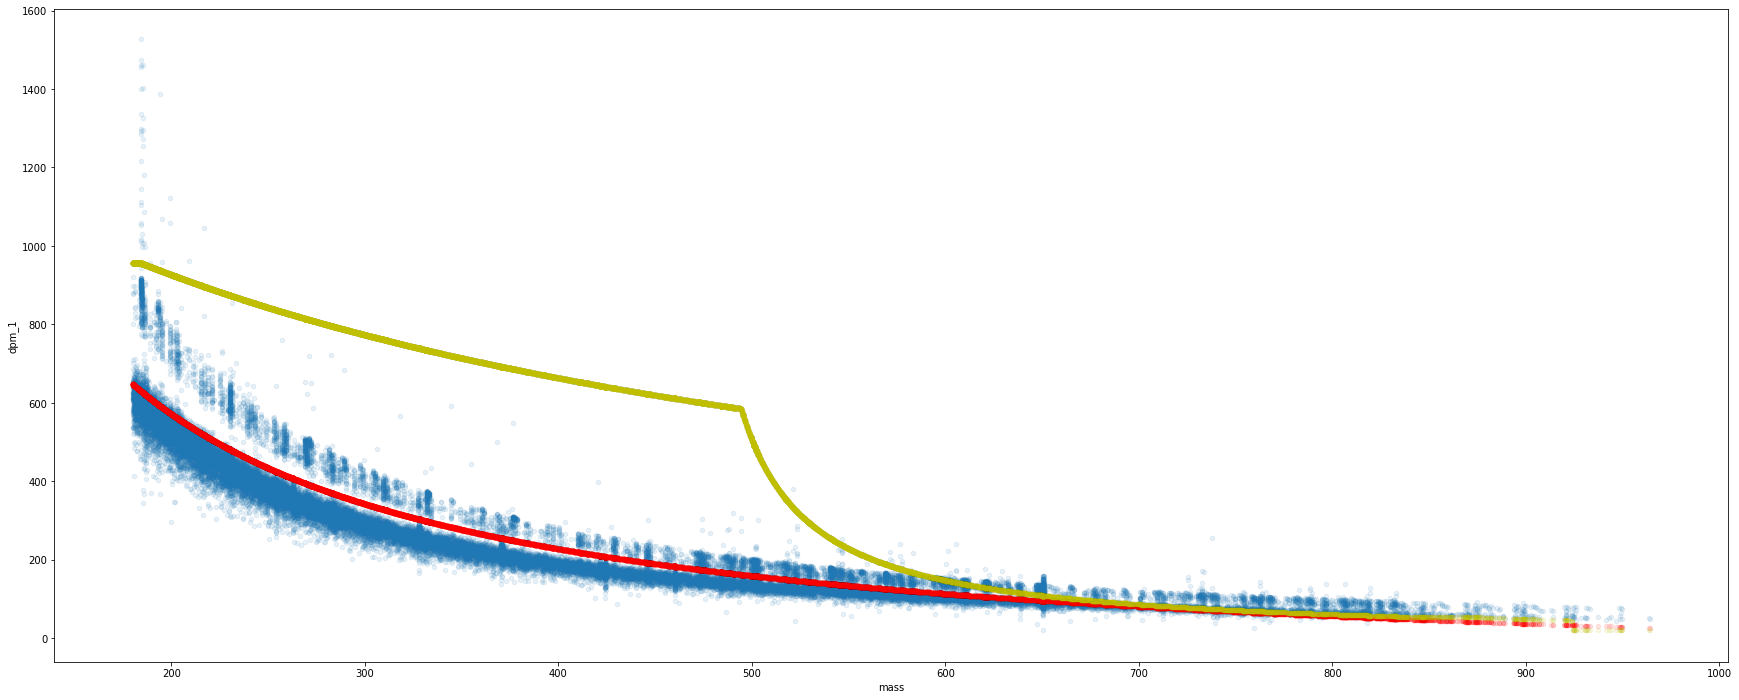

In [1992]:
fig1, ax2 = plt.subplots(figsize=(30,12))
ms2_data.plot.scatter(x='mass',y='resolution_1', alpha=0.1, ax = ax2)
ms2_data.plot.scatter(x='mass',y='lx1_res_d_1', color = 'r', alpha=0.1,ax = ax2)
ms2_data.plot.scatter(x='mass',y='dpm_1',  color = 'y', alpha=0.1,ax = ax2)
